# 16.1 (IMAGE RECOGNITION: THE FASHION-MNIST DATASET)
 Keras comes bundled with the Fashion-MNIST database of fashion articles which, like the MNIST digits dataset, provides 28-by-28 grayscale images. Fashion-MNIST contains clothing-article images labeled in 10 categories—0 (T-shirt/top), 1 (Trouser), 2 (Pullover), 3 (Dress), 4 (Coat), 5 (Sandal), 6 (Shirt), 7 (Sneaker), 8 (Bag), 9 (Ankle boot)—with 60,000 training samples and 10,000 testing samples. 
 * Modify this chapter’s convnet example to load and process Fashion-MNIST rather than MNIST—this requires simply importing the correct module, 
 * loading the data then running the model with these images and labels, 
 * then re-run the entire example.
 
  **Main Idea** 
  How well does the model perform on Fashion-MNIST compared to MNIST? How do the training times compare?

## 1. Loading the Dataset

In [110]:
import tensorflow as tf
from keras.datasets import fashion_mnist

# Load Fashion-MNIST dataset 
# load_data() returns two tuples:
# the first is the training data and labels
# the second is the test data and labels
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [111]:

print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


## 2. Data Exploration


* Check dimensions of the **training set images (`X_train`)**, **training set labels (`y_train`)**, **testing set images (`X_test`)** and **testing set labels (`y_test`)**: 

In [112]:
x_train.shape

(60000, 28, 28)

In [113]:
x_test.shape

(10000, 28, 28)

In [114]:
y_train.shape

(60000,)

In [115]:
y_test.shape

(10000,)

## 3. Visualize Fashion

Displaing 24 Fashion-MNIST training set image

In [116]:
%matplotlib inline

In [117]:
import matplotlib.pyplot as plt

In [118]:
import seaborn as sns

In [119]:
sns.set(font_scale=2)

* Run cell several times to view different digits and see **why handwritten digit recognition is a challenge**

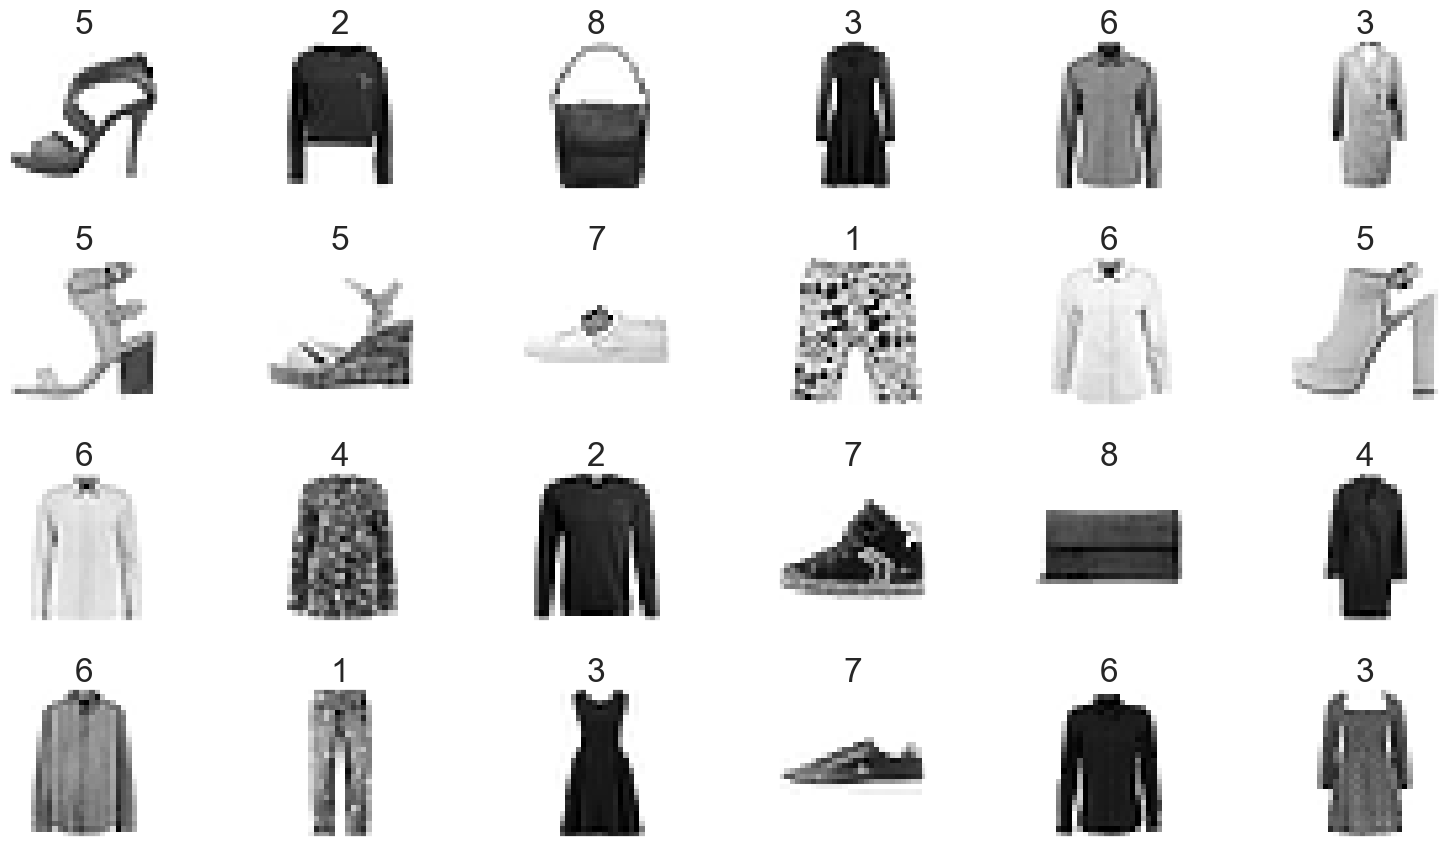

In [120]:
import numpy as np
# Displaying 24 Fashion-MNIST training set images
# Create a list of 24 random indices
index = np.random.choice(np.arange(len(x_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), x_train[index], y_train[index]):
    # axes.ravel() flattens the 4x6 array of axes into a 1D array of 24 axes
    # zip() pairs each axis with an image and its corresponding label
    axes, image, target = item
    # axes is a single subplot axis
    # image is a 28x28 numpy array
    # target is the label (0-9)
    axes.imshow(image, cmap=plt.cm.gray_r)  # display the image in grayscale 
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

0 = T-shirt/top

1 = Trouser

2 = Pullover

3 = Dress

4 = Coat

5 = Sandal

6 = Shirt

7 = Sneaker

8 = Bag

9 = Ankle boot


## 4. Data Preparation

### Reshaping the Image Data

* **Keras convnets** require **NumPy array inputs**
* Each **sample** must have the **shape**
> `(`**width**`,` **height**`,` **channels**`)`
* Each pixel has **one channel** (grayscale shade 0-255), so sample shapes will be
> **`(28, 28, 1)`**
* As the **neural network learns** from the images, it **creates many more channels**
    * These channels will **represent more complex features**, like **edges**, **curves** and **lines**
    * Enable network to **recognize digits** based on these features and how they’re **combined**

In [121]:
# reshape data to add channel dimension
# Fashion-MNIST images are 28x28 pixels, and we add a single channel dimension for grayscale
x_train = x_train.reshape(60000, 28 , 28, 1)

x_train.shape


(60000, 28, 28, 1)

In [122]:

x_test = x_test.reshape(10000, 28 , 28, 1)

x_test.shape

(10000, 28, 28, 1)

### Normalizing The Image Data
* **Numeric feature values** may vary widely
* Deep learning networks **perform better** on data that's **normalized** into
    * the range **0.0-1.0**, or
    * a range for which the data’s **mean is 0.0** and its **standard deviation is 1.0**
        * S. Ioffe and Szegedy, C., “Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift.” https://arxiv.org/abs/1502.03167
* Divide **each pixel** value by **255** to normalize into the range **0.0-1.0**:

In [123]:
# Normalize pixel values to be between 0 and 1
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255 

### One-Hot Encoding: Convert Labels to Categorical Data
* **Predictions** for each digit will be an **array of 10 probabilities**
* To **evaluate model accuracy**, Keras **compares predictions to dataset's labels**
    * Both must have the **same shape**
    * MNIST labels are **individual integers 0-9**
* Must **transform labels** into **categorical data arrays** matching the **prediction format**
* Use [**one-hot encoding**](https://en.wikipedia.org/wiki/One-hot) to convert labels from integers into 10-element **arrays of 1.0s and 0.0s**
    * **only one element is 1.0** and the **rest are 0.0s**
* Categorical representation of a **7**
> <pre>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, <strong>1.0</strong>, 0.0, 0.0]</pre>
* **`tensorflow.keras.utils`** function **`to_categorical`** performs **one-hot encoding**
* Transform **`y_train`** and **`y_test`** into **two-dimensional arrays of categorical data**

In [124]:
from keras.utils import to_categorical

In [125]:
y_train = to_categorical(y_train)


In [126]:
y_train.shape

(60000, 10)

In [127]:
y_train[0]  # one sample’s categorical data


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [128]:
y_test = to_categorical(y_test)

In [129]:
y_test.shape

(10000, 10)

In [130]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## 5. Creating the Neural Network

* Configure a **convolutional neural network**
* **`Sequential` model** stacks layers to **execute sequentially**
    * **output** of one layer becomes **input** to the next
    * **Feed-forward network**
    * Later, you’ll see that not all layers feed output to the next layer

In [131]:
from keras.models import Sequential


In [132]:
Baseline_CNN = Sequential()

In [133]:
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
# Add a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape of 28x28x1
Baseline_CNN.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a max pooling layer with a 2x2 pool size
Baseline_CNN.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\12516\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
Baseline_CNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
Baseline_CNN.add(MaxPooling2D(pool_size=(2, 2)))

In [135]:
# A Keras Flatten layer reshapes its input to one dimension.
Baseline_CNN.add(Flatten())

### Adding a Dense Layer to Reduce the Number of Features

* Layers before the **`Flatten`** layer **learned digit features**
* Now must **learn the relationships among those features** to **classify** which digit each image represents
* Accomplished with **fully connected `Dense` layers**
* The following **`Dense` layer** creates **128 neurons (`units`)** that **learn** from the 3200 outputs of the previous layer

In [136]:
Baseline_CNN.add(Dense(units=128, activation='relu'))


### Adding Another Dense Layer to Produce the Final Output

* Final **`Dense`** layer **classifies** inputs into **neurons** representing the classes **0-9**
* The **`softmax` activation function** converts values of these 10 neurons into **classification probabilities**
* **Neuron** with **highest probability** represents the **prediction** for a given digit image

In [137]:

Baseline_CNN.add(Dense(units=10, activation='softmax'))

### Printing the Model’s Summary

In [138]:
Baseline_CNN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

### Visualizing a Model's Structure

In [139]:
# from keras.utils import plot_model
# from IPython.display import Image
# plot_model(CNN, to_file='convnet.png', show_shapes=True, show_layer_names=True)
# Image(filename='convnet.png')

### Compile the Model

* optimizer='adam'—The optimizer this model will use to adjust the weights throughout the neural network as it learns. There are many optimizers59— 'adam' performs well across a wide variety of models

* loss='categorical_crossentropy'—This is the loss function used by the optimizer in multi-classification networks like our convnet, which will predict 10 classes. As the neural network learns, the optimizer attempts to minimize the values returned by the loss function. The lower the loss, the better the neural network is at predicting what each image is. For binary classification (which we’ll use later in this chapter), Keras provides 'binary_crossentropy', and for regression, 'mean_squared_error'. For other loss functions, see https://keras.io/losses/.
* loss='categorical_crossentropy'—This is the loss function used by the optimizer in multi-classification networks like our convnet, which will predict 10 classes. As the neural network learns, the optimizer attempts to minimize the values returned by the loss function. The lower the loss, the better the neural network is at predicting what each image is. For binary classification (which we’ll use later in this chapter), Keras provides 'binary_crossentropy', and for regression, 'mean_squared_error'. For other loss functions, see https://keras.io/losses/.

In [140]:
Baseline_CNN.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [141]:
Baseline_CNN

<Sequential name=sequential_5, built=True>

## 6. Training and Evaluating the Model

* **Train a Keras model** by calling its **`fit` method**
```python
# cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
```
* **`epochs=5`**&mdash;train neural networks iteratively over time
    * Each **`epoch`** processes **every training dataset sample** once
    * **Hyperparameter** that may need tuning
* **`batch_size=64`**&mdash;**number of samples to process at a time**
    * Most models specify a **power of 2 from 32 to 512**
* [**`validation_split=0.1`**&mdash;model should reserve the **last** 10% of the training samples for validation](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed)
	* After each **epoch**, model uses validation samples to **make predictions** and display the **validation loss and accuracy**
    * Use **tune your layers** and the **`fit` method’s hyperparameters**, or possibly change the **layer composition** of your model
    * Can specify **separate validation data** with **`validation_data` argument**

In [142]:
import time
start = time.time()
Baseline_CNN.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
end = time.time()
print(f"Training Time: {end - start:.2f} sec")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.8287 - loss: 0.4755 - val_accuracy: 0.8765 - val_loss: 0.3526
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8859 - loss: 0.3134 - val_accuracy: 0.8893 - val_loss: 0.2944
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9039 - loss: 0.2636 - val_accuracy: 0.9003 - val_loss: 0.2656
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9148 - loss: 0.2289 - val_accuracy: 0.9082 - val_loss: 0.2527
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9248 - loss: 0.2019 - val_accuracy: 0.9158 - val_loss: 0.2390
Training Time: 161.80 sec


### Evaluating the Model
* we can check the accuracy of the model on data the model has not yet seen

In [143]:
loss, accuracy = Baseline_CNN.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9078 - loss: 0.2556


In [144]:
loss

0.25555142760276794

In [145]:
accuracy
#  our convnet model is 90.56% accurate when predicting the labels for unseen data

0.907800018787384

### Making Predictions

In [146]:
Predictions = Baseline_CNN.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [147]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [148]:
for index, i in enumerate(Predictions[0]):
    print(f'{index}: {i:.10%}')  

0: 0.0001530641%
1: 0.0000021076%
2: 0.0000033012%
3: 0.0000004599%
4: 0.0000026034%
5: 0.0023761500%
6: 0.0000020463%
7: 0.0915090728%
8: 0.0014691384%
9: 99.9044716358%


* our modek believe that digit 9 is 99.99% is is associated with ankle boot

### Locating the Incorrect Prediction

In [149]:
import numpy as np

images = X_test.reshape(10000, 28, 28)  # reshape for display
incorrect_prediction = []

for i, (prediction, actual) in enumerate(zip(Predictions, y_test)):
    predicted = np.argmax(prediction)       # predicted class
    expected  = np.argmax(actual)           # convert one-hot to class index
    if predicted != expected:
        incorrect_prediction.append((i, images[i], predicted, expected))


In [150]:
len(incorrect_prediction)

922

### Visualizing the Incorrect Prediction

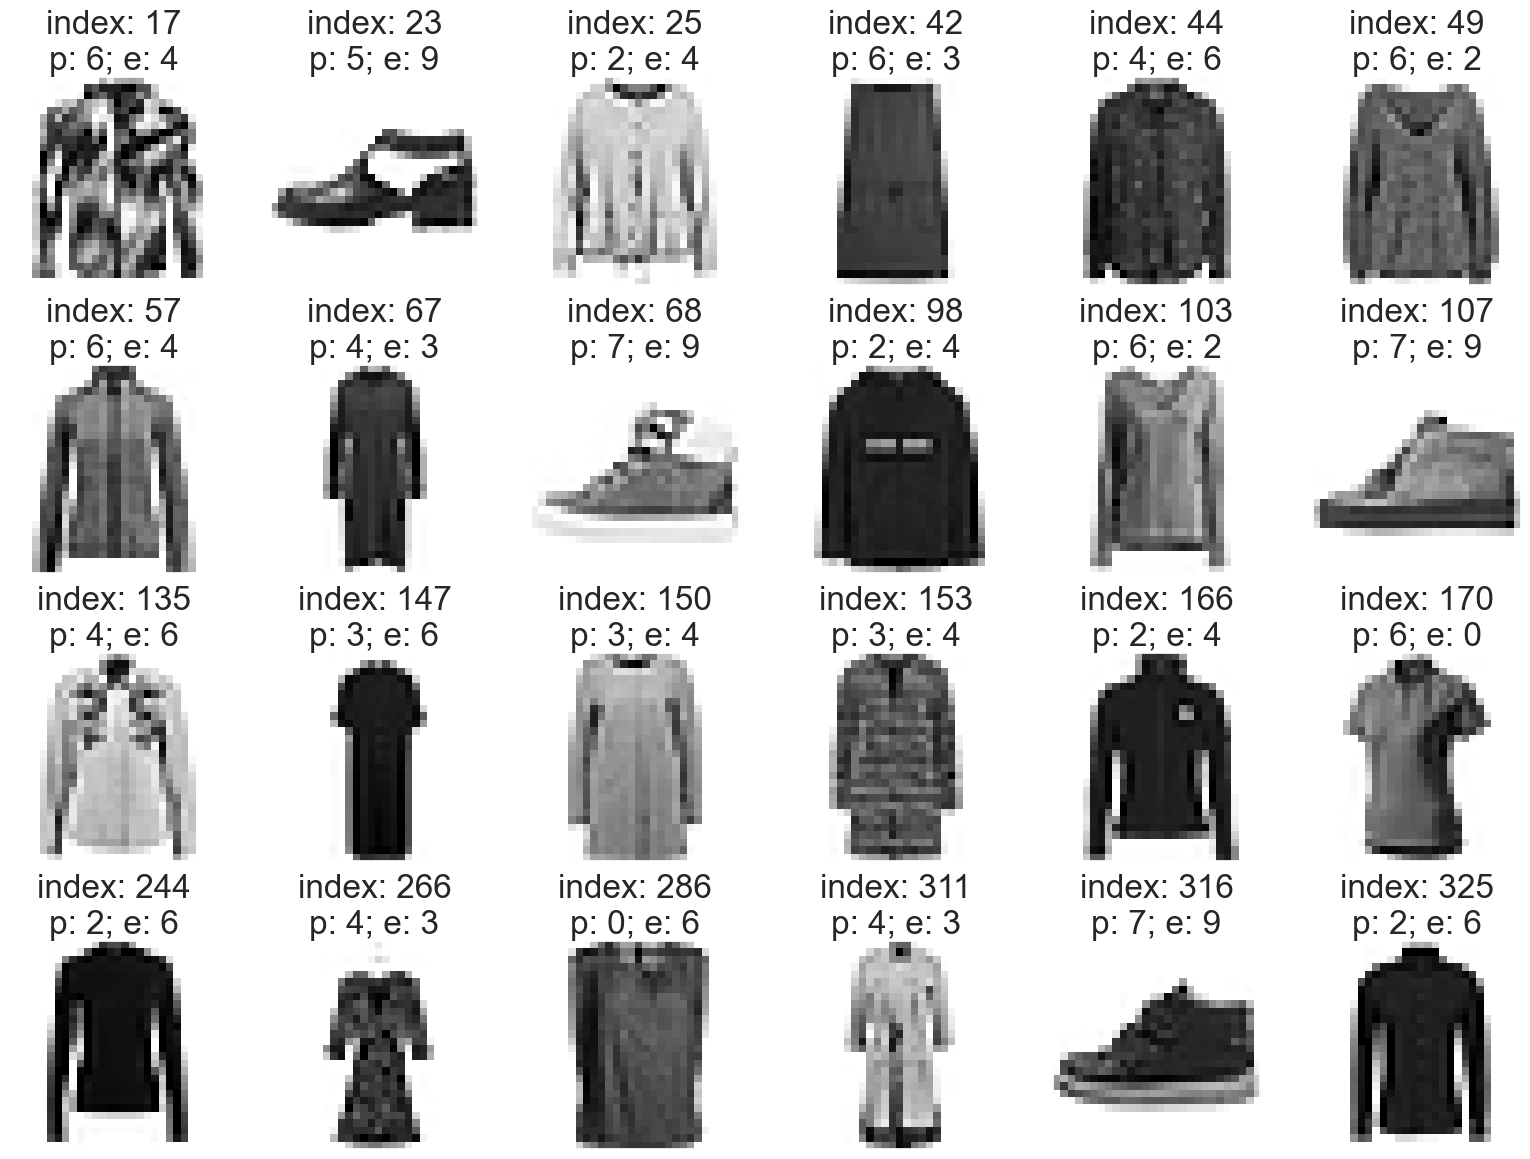

In [151]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_prediction[:24]):
        index, image, predicted, expected = item
        axes.imshow(image, cmap=plt.cm.gray_r)  # display the image in grayscale
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

### Displaying the Probabilities for Several Incorrect Predictions

In [152]:
def display_probabilities(Predictions):
    """Display the probabilities for each class for a given test image index."""
    for i, prob in enumerate(Predictions):
        print(f'{index}: {prob:.10%}')

In [153]:
display_probabilities(Predictions[495])

325: 0.0054250431%
325: 0.0000049083%
325: 0.0008021620%
325: 0.0011280207%
325: 0.0077657765%
325: 55.1320910454%
325: 0.0021730149%
325: 0.0318555394%
325: 0.0092750364%
325: 44.8094844818%


In [154]:
display_probabilities(Predictions[583])

325: 0.0000016390%
325: 0.0000000025%
325: 0.0000000256%
325: 0.0000000047%
325: 0.0000002643%
325: 0.0000191682%
325: 0.0000000858%
325: 0.0611940806%
325: 0.0000067557%
325: 99.9387741089%


## 8. Comparison Between Fashion-MNIST and MNIST

In [155]:
import time
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) / 255.0
x_test = x_test.reshape(10000, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
start = time.time()
cnn_mnist = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test, y_test), verbose=1)
end = time.time()

# Evaluate
mnist_loss, mnist_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nMNIST → Test Accuracy: {mnist_acc:.4f}, Training Time: {end - start:.2f} sec\n")


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.9487 - loss: 0.1701 - val_accuracy: 0.9812 - val_loss: 0.0561
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9848 - loss: 0.0489 - val_accuracy: 0.9883 - val_loss: 0.0366
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9882 - val_loss: 0.0312
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 108ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9901 - val_loss: 0.0277
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9897 - val_loss: 0.0283

MNIST → Test Accuracy: 0.9897, Training Time: 164.69 sec



**Summary**:

* Mnist (digit) gives a 99% accuarcy after a few epochs
* Fashion-Mnist gives a 90% accuaracy after numbers of epochs
* Fashion it is more complex than Mnist
* MNIST → Test Accuracy: 0.9928, Training Time: 111.21 sec
* Fashion-MNIST → Test Accuracy: 0.9123, Training Time: 0.2448



## 9. Saving and Loading a Model

In [156]:
Baseline_CNN.save('fashion_mnist_cnn_model.h5')
# To load the model back, use:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('fashion_mnist_cnn_model.h5')

# 10. Ex 16.4 on page 714. 
If you add another Dense layer with 4096 neurons, how does this change the prediction accuracy and speed?

 

### Creating a CNN for big_model

In [157]:
from keras import  regularizers
from keras.layers import Dropout

big_model = Sequential()

# Same conv layers as baseline
big_model.add(Conv2D(64, (4,4), activation='relu', input_shape=(28,28,1)))
big_model.add(MaxPooling2D((2,2)))
big_model.add(Conv2D(128, (4,4), activation='relu'))
big_model.add(MaxPooling2D((2,2)))

# Flatten 
big_model.add(Flatten())



### Adding Dense 4096 layer

In [158]:

big_model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
big_model.add(Dropout(0.5))


In [159]:

# Original Dense layers after 4096
big_model.add(Dense(128, activation='relu'))


In [160]:

# Additional Dense layer
big_model.add(Dense(64, activation='relu'))


In [161]:

# Final output layer
big_model.add(Dense(10, activation='softmax'))

### Printing the Big Model summary

In [162]:
big_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 64)     │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 9, 9, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,058,314 (34.55 MB)

 Trainable params: 9,058,314 (34.55 MB)

 Non-trainable params: 0 (0.00 B)

### Visualizing a big Model's Structure

### Compile the big Model

In [163]:
big_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

### Training the Big Model


In [167]:
big_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 191s 223ms/step - accuracy: 0.1127 - loss: 2.3179 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 156s 184ms/step - accuracy: 0.1132 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 125s 149ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 119s 141ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 119s 141ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3021


### Evaluating the Model

In [168]:
loss1, accuracy1 = big_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss1}, Test Accuracy: {accuracy1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.1135 - loss: 2.3011
Test Loss: 2.301055669784546, Test Accuracy: 0.11349999904632568


In [169]:
Big_Predictions = big_model.predict(X_test)
Big_Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[0.09835611, 0.11241639, 0.09956891, ..., 0.10289127, 0.09727346,
        0.10062096],
       [0.09835611, 0.11241639, 0.09956891, ..., 0.10289127, 0.09727346,
        0.10062096],
       [0.0983562 , 0.11241648, 0.09956883, ..., 0.10289117, 0.09727353,
        0.10062099],
       ...,
       [0.09835611, 0.11241639, 0.09956891, ..., 0.10289127, 0.09727346,
        0.10062096],
       [0.09835616, 0.11241645, 0.09956885, ..., 0.1028912 , 0.0972735 ,
        0.10062097],
       [0.09835611, 0.11241639, 0.09956891, ..., 0.10289127, 0.09727346,
        0.10062096]], shape=(10000, 10), dtype=float32)

In [170]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [171]:
for index, i in enumerate(Big_Predictions[0]):
    print(f'{index}: {i:.10%}')

0: 9.8356105387%
1: 11.2416386604%
2: 9.9568910897%
3: 10.0137002766%
4: 9.7085416317%
5: 9.1536909342%
6: 10.0113533437%
7: 10.2891273797%
8: 9.7273461521%
9: 10.0620962679%
